In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,r2_score,mean_squared_error
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import warnings

In [2]:
boston=datasets.load_boston()
df=pd.DataFrame(boston.data,columns=boston.feature_names)
targets=boston.target

C:\Users\mohamedirfan.suffeer\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include

In [3]:
df['PRICE']=targets

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


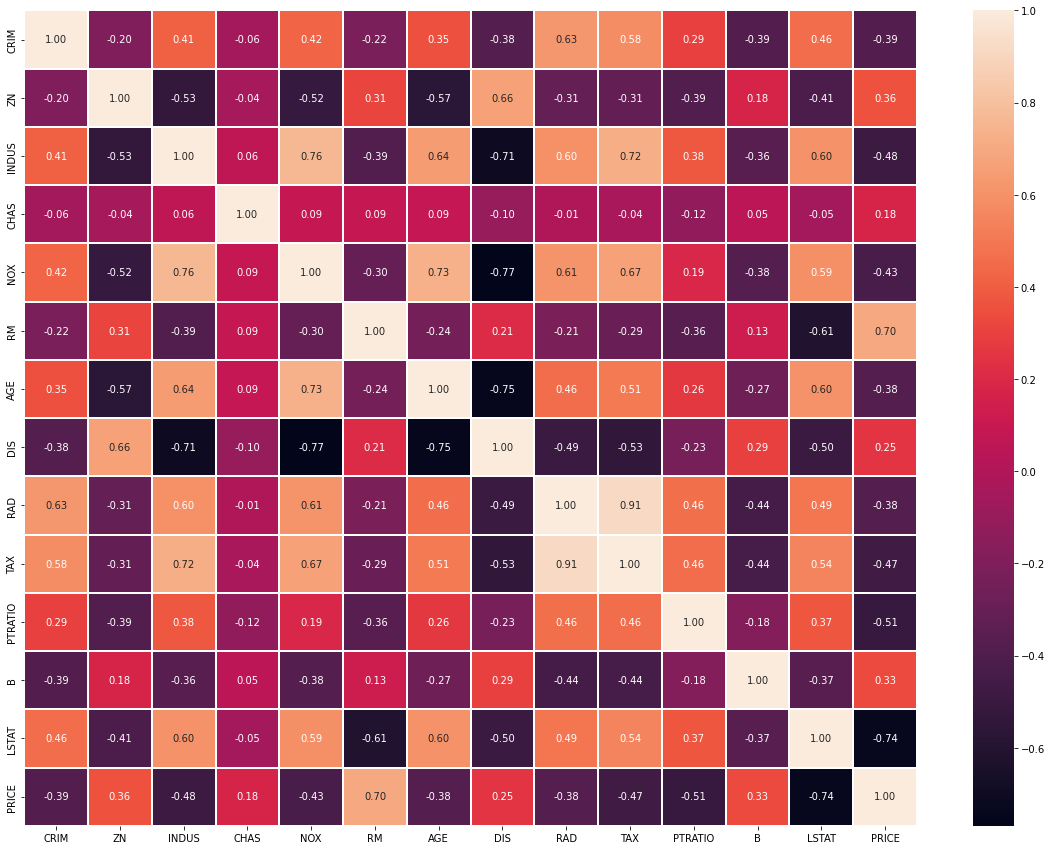

In [12]:
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(df.corr(), annot = True, linewidths= 2, fmt = '.2f', ax = ax)
plt.show()

In [14]:
# Calculating correlation matrix
ContinuousCols=['PRICE','CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'B', 'LSTAT']

# Creating the correlation matrix
CorrelationData=df[ContinuousCols].corr()
CorrelationData

,PRICE,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
PRICE,1.000000,-0.388305,0.360445,-0.483725,-0.427321,0.695360,-0.376955,0.249929,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,0.603800
NOX,-0.427321,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,0.291512,-0.496996
TAX,-0.468536,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,-0.441808,0.543993
PTRATIO,-0.507787,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,-0.177383,0.374044


In [16]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['PRICE'][abs(CorrelationData['PRICE']) > 0.5 ]

PRICE      1.000000
RM         0.695360
PTRATIO   -0.507787
LSTAT     -0.737663
Name: PRICE, dtype: float64

In [17]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [19]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['RAD', 'CHAS']
FunctionAnova(inpData=df, 
              TargetVariable='PRICE', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

RAD is correlated with PRICE | P-Value: 3.1256493316010175e-24
CHAS is correlated with PRICE | P-Value: 7.390623170520815e-05


['RAD', 'CHAS']

In [20]:
SelectedColumns=['RM', 'PTRATIO','LSTAT', 'RAD', 'CHAS']

# Selecting final columns
DataForML=df[SelectedColumns]
DataForML.head()

,RM,PTRATIO,LSTAT,RAD,CHAS
0,6.575,15.3,4.98,1.0,0.0
1,6.421,17.8,9.14,2.0,0.0
2,7.185,17.8,4.03,2.0,0.0
3,6.998,18.7,2.94,3.0,0.0
4,7.147,18.7,5.33,3.0,0.0


In [22]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['PRICE']=df['PRICE']

# Printing sample rows
DataForML_Numeric.head()

,RM,PTRATIO,LSTAT,RAD,CHAS,PRICE
0,6.575,15.3,4.98,1.0,0.0,24.0
1,6.421,17.8,9.14,2.0,0.0,21.6
2,7.185,17.8,4.03,2.0,0.0,34.7
3,6.998,18.7,2.94,3.0,0.0,33.4
4,7.147,18.7,5.33,3.0,0.0,36.2


In [24]:
# Separate Target Variable and Predictor Variables
TargetVariable='PRICE'
Predictors=['RM', 'PTRATIO', 'LSTAT', 'RAD', 'CHAS']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

array([[ 6.575, 15.3  ,  4.98 ,  1.   ,  0.   ],
       [ 6.421, 17.8  ,  9.14 ,  2.   ,  0.   ],
       [ 7.185, 17.8  ,  4.03 ,  2.   ,  0.   ],
       ...,
       [ 6.976, 21.   ,  5.64 ,  1.   ,  0.   ],
       [ 6.794, 21.   ,  6.48 ,  1.   ,  0.   ],
       [ 6.03 , 21.   ,  7.88 ,  1.   ,  0.   ]])

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
x_scaled=scaler.fit_transform(X)
x_scaled

array([[ 0.41367189, -1.45900038, -1.0755623 , -0.98284286, -0.27259857],
       [ 0.19427445, -0.30309415, -0.49243937, -0.8678825 , -0.27259857],
       [ 1.28271368, -0.30309415, -1.2087274 , -0.8678825 , -0.27259857],
       ...,
       [ 0.98496002,  1.17646583, -0.98304761, -0.98284286, -0.27259857],
       [ 0.72567214,  1.17646583, -0.86530163, -0.98284286, -0.27259857],
       [-0.36276709,  1.17646583, -0.66905833, -0.98284286, -0.27259857]])

In [29]:
y_scaled=scaler.fit_transform(y[:,None])

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,test_size=0.3,random_state=25)

In [31]:
rf=RandomForestRegressor()

In [32]:
warnings.filterwarnings('ignore')

In [33]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [34]:
y_pred=rf.predict(x_test)

In [35]:
#Test accuracy
r2_score(y_test,y_pred)

0.7779310274107516

In [36]:
#mean squared error
mean_squared_error(y_test,y_pred)

0.19820045281482965

In [37]:
rf.score(x_test,y_test)

0.7779310274107516

In [38]:
#gridsearch cv for hyper parameter tuning
grid_param = {
    "n_estimators" : [25,50,75,100],
    'max_depth' :[2,5,10],
    'min_samples_leaf' : [1,3,5],
    'min_samples_split': [2,5,10],
    'max_features' : ['auto','log2']
}

In [39]:
grid_search = GridSearchCV(estimator=rf,param_grid=grid_param,n_jobs =-1,verbose = 3)

In [41]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [25, 50, 75, 100]},
             verbose=3)

In [42]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

In [43]:
rand_clf = RandomForestRegressor(max_features = 'log2',
 max_depth = 10,
 min_samples_leaf = 1,
 min_samples_split= 2,
 n_estimators = 75)

In [44]:
rand_clf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=75)

In [45]:
rand_clf.score(x_test,y_test)

0.8303413321178578

In [46]:
import pickle

with open('rforest.pickle', 'wb') as f:
    pickle.dump(rand_clf,f)